In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter,
                           MultiprocessingEvaluator, Policy, Scenario)

from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

from ema_workbench import (Model, )

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time

from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [2]:
uncertainties = dike_model.uncertainties
levers = dike_model.levers 

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)

In [16]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=100)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 70 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [17]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2,scenario,policy,model
0,124.0,130.057166,1.5,0.977482,119.054038,1,0.713070,332.740751,1.5,0.117409,...,0.130662,177.228340,10,0.676707,3.5,4.5,3.5,104,None,dikesnet
1,69.0,240.462760,10,0.786755,137.310626,10,0.658293,178.255948,10,0.981806,...,0.016239,295.106952,10,0.262978,4.5,3.5,3.5,105,None,dikesnet
2,47.0,135.099676,1,0.500744,335.162747,1.5,0.702110,88.392394,10,0.818325,...,0.867702,139.547195,10,0.295058,3.5,1.5,1.5,106,None,dikesnet
3,64.0,256.277091,10,0.562314,228.679944,10,0.242667,343.816409,1.5,0.887943,...,0.210713,265.834785,10,0.600813,1.5,4.5,4.5,107,None,dikesnet
4,126.0,344.143996,10,0.017324,263.555949,10,0.890648,284.317386,10,0.353638,...,0.249921,302.071083,1,0.329352,2.5,1.5,4.5,108,None,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,122.0,226.983988,1,0.588553,37.641164,1,0.113240,223.480869,1.5,0.439233,...,0.203480,220.625823,1,0.917206,4.5,1.5,2.5,199,None,dikesnet
96,76.0,248.369119,10,0.605031,300.773172,1,0.130721,312.230510,1.5,0.550322,...,0.151634,185.055142,1,0.163353,2.5,4.5,2.5,200,None,dikesnet
97,85.0,150.289513,10,0.374812,125.805952,1.5,0.379288,349.280194,10,0.618897,...,0.799420,159.296483,1,0.743283,2.5,4.5,2.5,201,None,dikesnet
98,27.0,190.760100,10,0.869543,267.161636,1,0.332515,66.375342,1,0.802665,...,0.224837,227.751244,10,0.867771,4.5,4.5,4.5,202,None,dikesnet


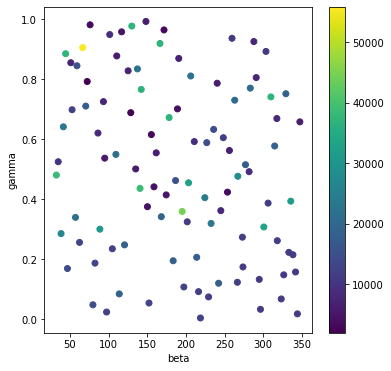

In [18]:
from ema_workbench.analysis import plotting, plotting_util

evac = outcomes['Expected Evacuation Costs 2']
maxEvac = evac

fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.1_Bmax'], experiments['A.1_pfail'], c=maxEvac)
plt.colorbar(sc)
ax.set_xlabel('A.1_Bmax')
ax.set_ylabel('A.1_pfail')
plt.show()

In [27]:
data

,A.4_Expected Annual Damage 0,A.4_Dike Investment Costs 0,A.4_Expected Number of Deaths 0,A.5_Expected Annual Damage 0,A.5_Dike Investment Costs 0,A.5_Expected Number of Deaths 0,RfR Total Costs 0,Expected Evacuation Costs 0,A.4_Expected Annual Damage 1,A.4_Dike Investment Costs 1,...,RfR Total Costs 1,Expected Evacuation Costs 1,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,1.746583e+06,5.410000e+06,0.000105,0.000000e+00,2.271000e+07,0.000000,0,36846.140828,1.431953e+06,5.410000e+06,...,0,36846.140828,1.746583e+06,5.410000e+06,0.000105,0.000000e+00,2.271000e+07,0.000000,0,36846.140828
1,4.268552e+07,5.410000e+06,0.003176,0.000000e+00,2.271000e+07,0.000000,0,5971.715789,5.206440e+07,5.410000e+06,...,0,5971.715789,5.206440e+07,5.410000e+06,0.003176,0.000000e+00,2.271000e+07,0.000000,0,5971.715789
2,0.000000e+00,5.410000e+06,0.000000,6.032626e+07,2.271000e+07,0.007912,0,5935.994802,0.000000e+00,5.410000e+06,...,0,5935.994802,0.000000e+00,5.410000e+06,0.000000,9.821335e+07,2.271000e+07,0.007912,0,5935.994802
3,2.620453e+07,5.410000e+06,0.001031,0.000000e+00,2.271000e+07,0.000000,0,6654.845996,1.319629e+07,5.410000e+06,...,0,6654.845996,1.319629e+07,5.410000e+06,0.001031,0.000000e+00,2.271000e+07,0.000000,0,6654.845996
4,0.000000e+00,5.410000e+06,0.000000,0.000000e+00,2.271000e+07,0.000000,0,11403.966079,0.000000e+00,5.410000e+06,...,0,11403.966079,0.000000e+00,5.410000e+06,0.000000,0.000000e+00,2.271000e+07,0.000000,0,11403.966079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.121495e+07,5.410000e+06,0.000896,0.000000e+00,2.271000e+07,0.000000,0,14986.549366,2.227008e+07,5.410000e+06,...,0,14986.549366,1.717052e+07,5.410000e+06,0.000896,0.000000e+00,2.271000e+07,0.000000,0,14986.549366
96,8.237986e+06,5.410000e+06,0.000406,0.000000e+00,2.271000e+07,0.000000,0,12224.202158,5.380654e+06,5.410000e+06,...,0,12224.202158,8.237986e+06,5.410000e+06,0.000406,0.000000e+00,2.271000e+07,0.000000,0,12224.202158
97,0.000000e+00,5.410000e+06,0.000000,0.000000e+00,2.271000e+07,0.000000,0,4310.982866,0.000000e+00,5.410000e+06,...,0,4310.982866,0.000000e+00,5.410000e+06,0.000000,0.000000e+00,2.271000e+07,0.000000,0,4310.982866
98,2.102256e+07,5.410000e+06,0.001687,0.000000e+00,2.271000e+07,0.000000,0,6728.057875,2.102256e+07,5.410000e+06,...,0,6728.057875,2.102256e+07,5.410000e+06,0.001687,0.000000e+00,2.271000e+07,0.000000,0,6728.057875


In [38]:
data = pd.DataFrame(outcomes)
data = data.iloc[:,16::]

In [39]:
data

,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,1.746583e+06,5.410000e+06,0.000105,0.000000e+00,2.271000e+07,0.000000,0,36846.140828
1,5.206440e+07,5.410000e+06,0.003176,0.000000e+00,2.271000e+07,0.000000,0,5971.715789
2,0.000000e+00,5.410000e+06,0.000000,9.821335e+07,2.271000e+07,0.007912,0,5935.994802
3,1.319629e+07,5.410000e+06,0.001031,0.000000e+00,2.271000e+07,0.000000,0,6654.845996
4,0.000000e+00,5.410000e+06,0.000000,0.000000e+00,2.271000e+07,0.000000,0,11403.966079
...,...,...,...,...,...,...,...,...
95,1.717052e+07,5.410000e+06,0.000896,0.000000e+00,2.271000e+07,0.000000,0,14986.549366
96,8.237986e+06,5.410000e+06,0.000406,0.000000e+00,2.271000e+07,0.000000,0,12224.202158
97,0.000000e+00,5.410000e+06,0.000000,0.000000e+00,2.271000e+07,0.000000,0,4310.982866
98,2.102256e+07,5.410000e+06,0.001687,0.000000e+00,2.271000e+07,0.000000,0,6728.057875


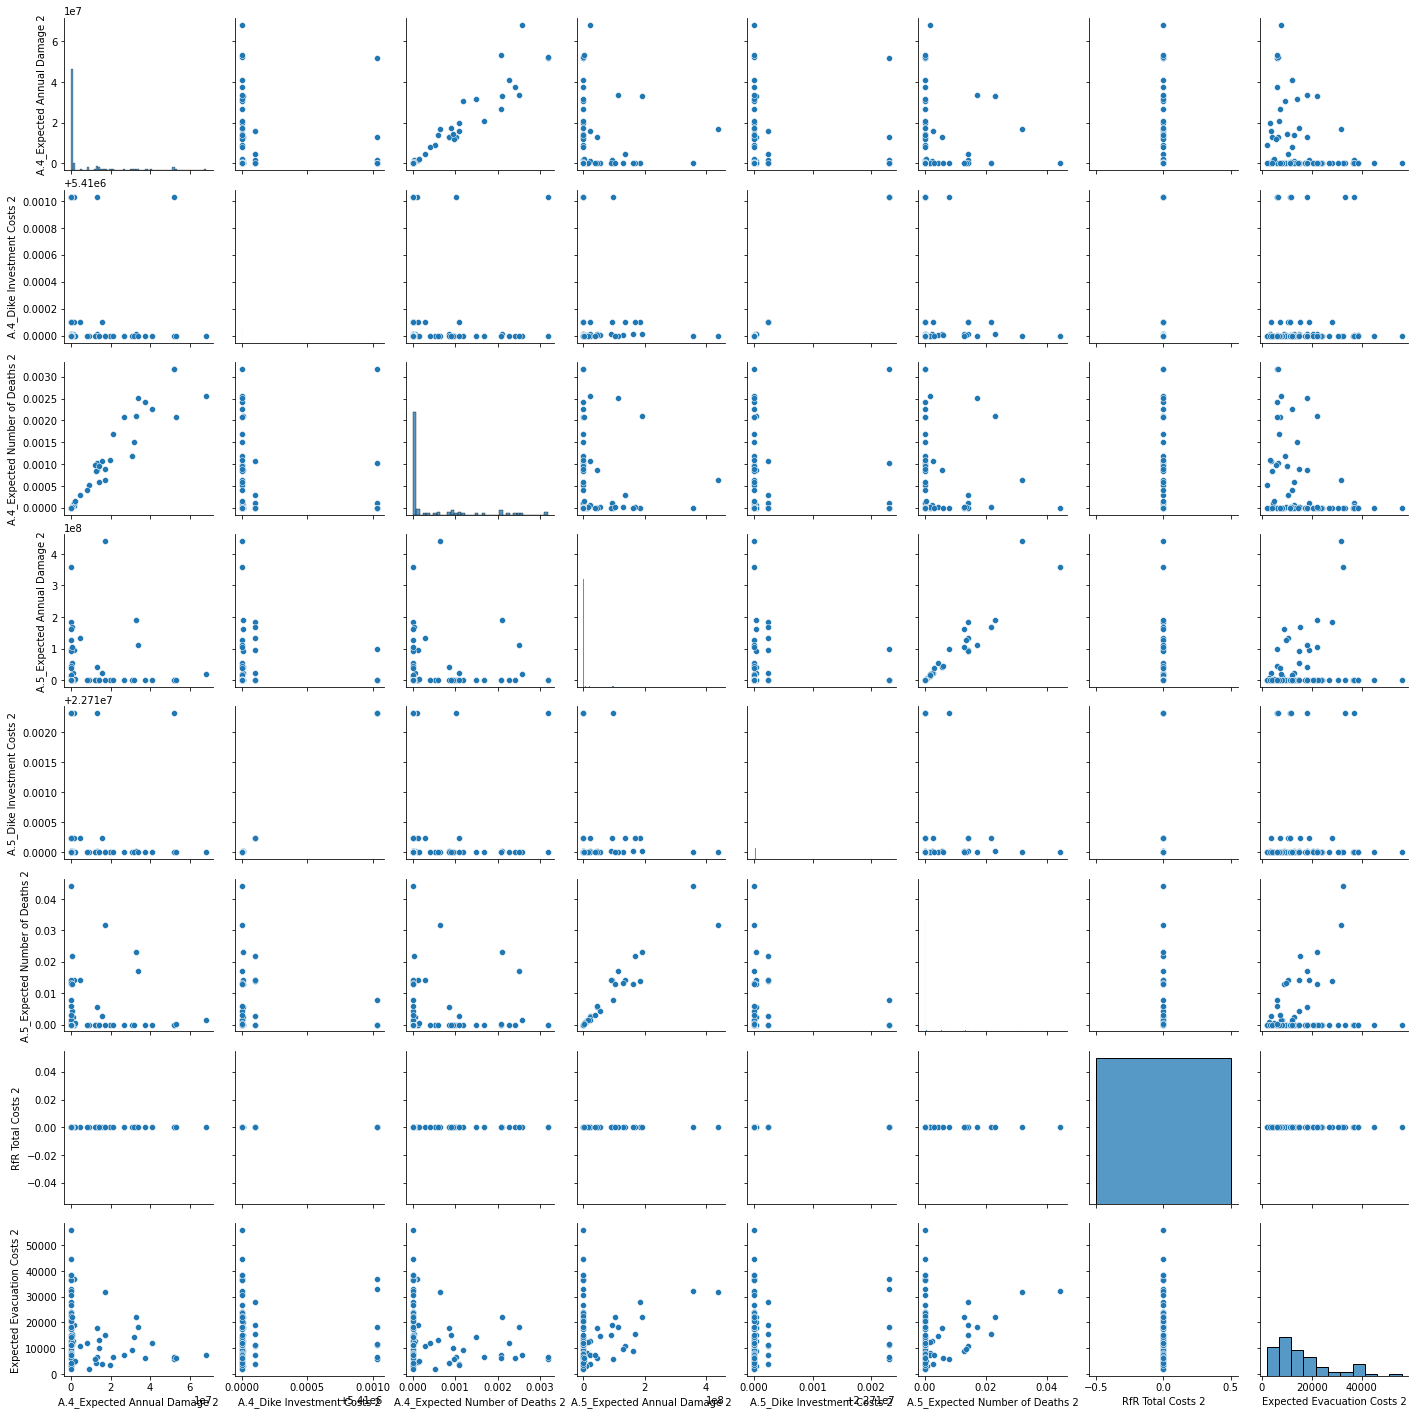

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, vars=list(data.keys()))
plt.show()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because on

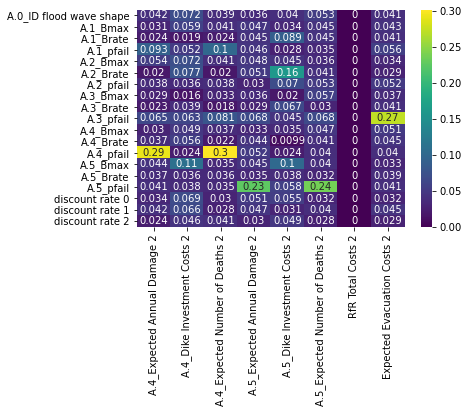

In [42]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = data

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()